# Customer Analytics

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `student_id`   | A unique ID for each student.                 |
| `city`  | A code for the city the student lives in.  |
| `city_development_index` | A scaled development index for the city.       |
| `gender` | The student's gender.       |
| `relevant_experience` | An indicator of the student's work relevant experience.       |
| `enrolled_university` | The type of university course enrolled in (if any).       |
| `education_level` | The student's education level.       |
| `major_discipline` | The educational discipline of the student.       |
| `experience` | The student's total work experience (in years).       |
| `company_size` | The number of employees at the student's current employer.       |
| `company_type` | The type of the student's current employer.       |
| `last_new_job` | The number of years between the student's current and previous jobs.       |
| `training_hours` | The number of hours of training completed.       |
| `job_change` | An indicator of whether the student is looking for a new job (`1`) or not (`0`).       |

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
ds_jobs = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\5_Customer_Analytics\customer_train.csv')

ds_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [185]:
ds_jobs_transformed = ds_jobs.copy()

In [186]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [187]:
ds_jobs.describe()

,student_id,city_development_index,training_hours,job_change
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [188]:
ds_jobs.describe(include='object')

,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Data Types:
- `student_id`
- `city`: nominal categorical
- `city_development_index`: continuous numeric
- `gender`: nominal categorical
- `relevant_experience`: boolean
- `enrolled_university`: ordinal categorical
- `education_level`: ordinal categorical
- `major_discipline	`: nominal categorical
- `experience`: ordinal categorical
- `company_size`: ordinal categorical
- `company_type`: nominal categorical
- `last_new_job`: ordinal categorical
- `training_hours`: discrete numeric
- `job_change`: boolean

In [189]:
# Update the numeric and nominal categorical data types first.

# Float Data Type
ds_jobs_transformed['city_development_index'] = ds_jobs_transformed['city_development_index'].astype('float16')

# Integer Data Type
ds_jobs_transformed['student_id'] = ds_jobs_transformed['student_id'].astype('int32')
ds_jobs_transformed['training_hours'] = ds_jobs_transformed['training_hours'].astype('int32')

# Boolean Data Types
ds_jobs_transformed['job_change'] = ds_jobs_transformed['job_change'].astype('bool')

ds_jobs_transformed['relevant_experience'] = ds_jobs_transformed['relevant_experience'].map(lambda x: True if x=='Has relevant experience' else False)
ds_jobs_transformed['relevant_experience'] = ds_jobs_transformed['relevant_experience'].astype('bool')

# Nominal Categorical
nominal_cat = ['city', 'gender', 'major_discipline', 'company_type']

for column in nominal_cat:
    ds_jobs_transformed[column] = ds_jobs_transformed[column].astype('category')

In [190]:
# Ordinal Categorical
ordinal_cat = list(ds_jobs_transformed.select_dtypes('object').columns)

In [191]:
for column in ordinal_cat:
    print(ds_jobs_transformed[column].unique())

['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10-49' '100-499'
 '500-999']
['1' '>4' 'never' '4' '3' '2' nan]


In [192]:
ordinal_cat_dict = {'enrolled_university' : ['no_enrollment','Part time course','Full time course'],
'education_level' : ['Primary School','High School','Graduate','Masters','Phd'],
'experience' : ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'],
'company_size' : ['<10','10-49','50-99','100-499','500-999','1000-4999','5000-9999','10000+'],
'last_new_job' : ['never','1','2','3','4','>4']}

for column, value in ordinal_cat_dict.items():
    ds_jobs_transformed[column] = pd.Categorical(ds_jobs_transformed[column], categories=value, ordered=True)

In [193]:
ds_jobs_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              19158 non-null  int32   
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     19158 non-null  bool    
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int32   
 13  job_change              19158 non-null  bool    
dtypes: bool(2), category(9

In [194]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

After modifying the data types, the memory usage has significantly decreased from over 2 MB to just 475.1 KB.. Now computer can run more efficiently!

In [195]:
# The DataFrame should be filtered to only contain students with 10 or more years of experience at companies
# with at least 1000 employees, as their recruiter base is suited to more experienced professionals at enterprise companies.

ds_jobs_transformed.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.919922,Male,True,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,True
1,29725,city_40,0.775879,Male,False,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,False
2,11561,city_21,0.624023,NaN,False,Full time course,Graduate,STEM,5,NaN,NaN,never,83,False
3,33241,city_115,0.789062,NaN,False,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,True
4,666,city_162,0.767090,Male,True,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,False


In [196]:
ds_jobs_transformed[(ds_jobs_transformed['experience'] > '9')&(ds_jobs_transformed['company_size'] > '500-999')]

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
9,699,city_103,0.919922,NaN,True,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,False
12,25619,city_61,0.913086,Male,True,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,False
31,22293,city_103,0.919922,Male,True,Part time course,Graduate,STEM,19,5000-9999,Pvt Ltd,>4,141,False
34,26494,city_16,0.910156,Male,True,no_enrollment,Graduate,Business Degree,12,5000-9999,Pvt Ltd,3,145,False
40,2547,city_114,0.925781,Female,True,Full time course,Masters,STEM,16,1000-4999,Public Sector,2,14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19097,25447,city_103,0.919922,Male,True,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,57,False
19101,6803,city_16,0.910156,Male,True,no_enrollment,High School,NaN,10,10000+,Pvt Ltd,1,89,False
19103,32932,city_10,0.895020,Male,True,Part time course,Masters,Other,>20,1000-4999,Pvt Ltd,>4,18,False
19128,3365,city_16,0.910156,NaN,True,no_enrollment,Graduate,Humanities,>20,1000-4999,Pvt Ltd,>4,23,False


In [197]:
ds_jobs_transformed = ds_jobs_transformed[(ds_jobs_transformed['experience'] > '9')&(ds_jobs_transformed['company_size'] > '500-999')]

ds_jobs_transformed.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
9,699,city_103,0.919922,NaN,True,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,False
12,25619,city_61,0.913086,Male,True,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,False
31,22293,city_103,0.919922,Male,True,Part time course,Graduate,STEM,19,5000-9999,Pvt Ltd,>4,141,False
34,26494,city_16,0.910156,Male,True,no_enrollment,Graduate,Business Degree,12,5000-9999,Pvt Ltd,3,145,False
40,2547,city_114,0.925781,Female,True,Full time course,Masters,STEM,16,1000-4999,Public Sector,2,14,False


## Clean Data

In [198]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [199]:
ds_jobs.isna().sum()

student_id                   0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
job_change                   0
dtype: int64

In [200]:
np.floor(ds_jobs.shape[0] * 0.05)

957.0

In [201]:
# Drop observations in the features with missing values less than 5%.
ds_jobs.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], inplace=True)

In [202]:
ds_jobs.isna().sum()

student_id                   0
city                         0
city_development_index       0
gender                    3863
relevant_experience          0
enrolled_university          0
education_level              0
major_discipline          2222
experience                   0
company_size              5310
company_type              5476
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

In [203]:
# Gender
ds_jobs['gender'] = ds_jobs['gender'].fillna('Unknown')

# Major Discipline
ds_jobs['major_discipline'] = np.where(((ds_jobs['education_level']=='High School')|(ds_jobs['education_level']=='Primary School')), 'No Major', ds_jobs['major_discipline'])

# Company Size
ds_jobs['company_size'] = ds_jobs['company_size'].fillna('Unknown')

# Company Type
ds_jobs['company_type'] = ds_jobs['company_type'].fillna('Other')

In [204]:
ds_jobs.describe(include='object')

,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18014,18014,18014,18014,18014,17991,18014,18014,18014,18014
unique,123,4,2,3,5,6,22,9,6,6
top,city_103,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,Unknown,Pvt Ltd,1
freq,4194,12772,13190,13348,11188,13993,3182,5310,9475,7789


## Data Visualization

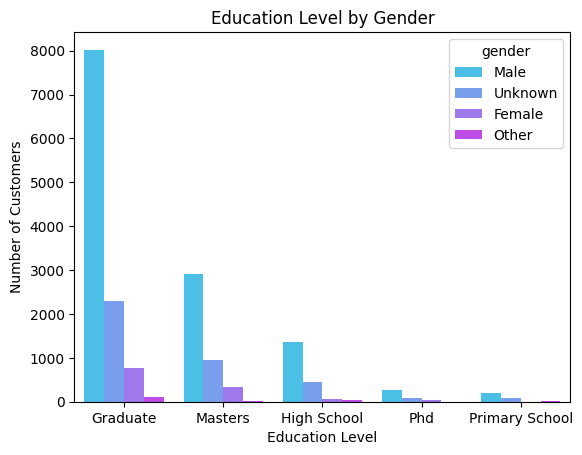

In [205]:
sns.countplot(data=ds_jobs, x='education_level', hue='gender', palette='cool')
plt.title('Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

plt.show()

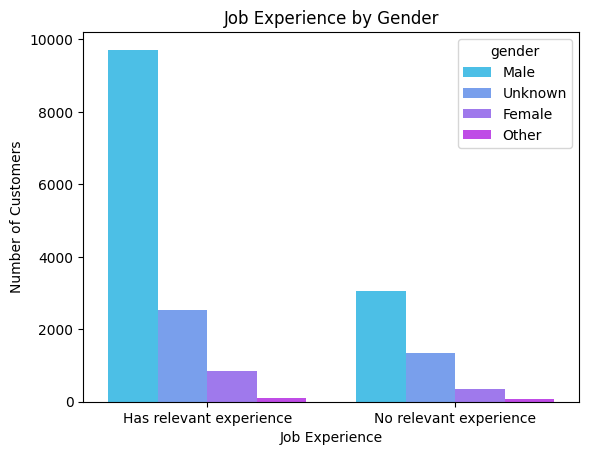

In [206]:
sns.countplot(data=ds_jobs, x='relevant_experience', hue='gender', palette='cool')
plt.title('Job Experience by Gender')
plt.xlabel('Job Experience')
plt.ylabel('Number of Customers')

plt.show()

The dataset predominantly consists of male customers. Among male customers, the majority are graduates, and most customers overall have relevant job experience.

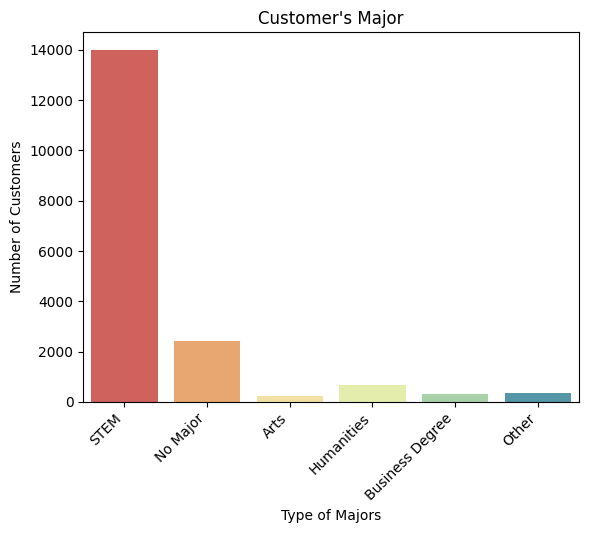

In [213]:
sns.countplot(data=ds_jobs, x='major_discipline', palette='Spectral')
plt.title("Customer's Major")
plt.xlabel('Type of Majors')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Customers')

plt.show()

The predominant major among customers is STEM (Science, Technology, Engineering, and Mathematics). This suggests that STEM is a highly sought-after and popular choice among customers.

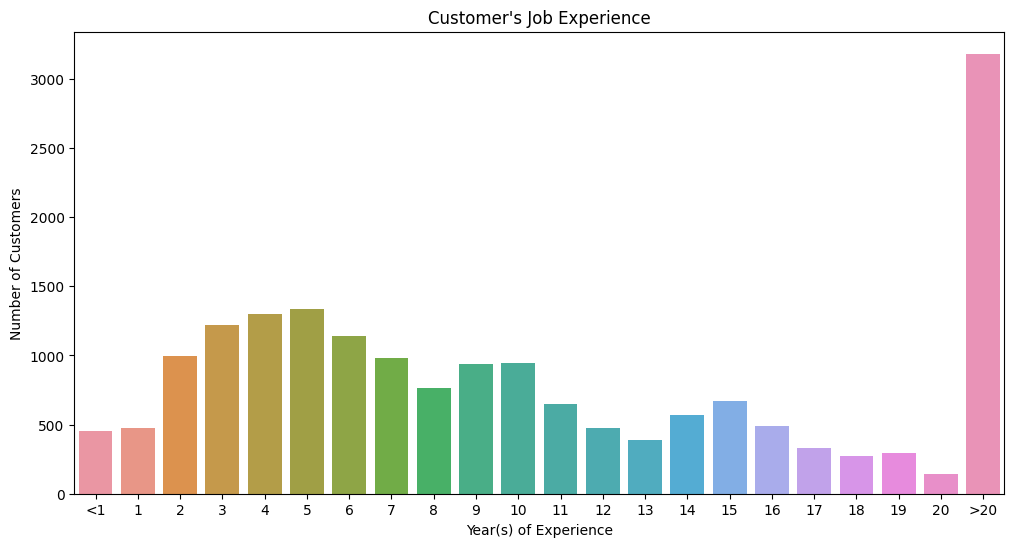

In [211]:
plt.figure(figsize=(12,6))
sns.countplot(data=ds_jobs, x='experience', order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'])
plt.title("Customer's Job Experience")
plt.xlabel('Year(s) of Experience')
plt.ylabel('Number of Customers')

plt.show()

It's intriguing to note that a significant portion of customers in the dataset possess over 20 years of professional experience.